In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Path of csv file for data on Covid-19 Known and Likely Deaths (aka Excess Deaths) by State
covid_excess_deaths_path = "Resources/Excess_Deaths_Associated_with_COVID-19.csv"

# Path of Excel file for data on Political Control by State, originally converted using tabula
state_political_control_path = "Resources/Political Control State-Level DF-Extract 2020-April.xlsx"

# Read the csv file
covid_excess_deaths_df = pd.read_csv(covid_excess_deaths_path, low_memory=False)

# Read the Excel file
state_political_control_df = pd.read_excel(state_political_control_path)

In [3]:
# Display the Covid-19 & Excess Deaths data table for preview
print()
print(f"Excess Deaths Probably Associated with Covid-19 Dataset")
covid_excess_deaths_df.head()


Excess Deaths Probably Associated with Covid-19 Dataset


,Week Ending Date,State,Observed Number,Upper Bound Threshold,Exceeds Threshold,Average Expected Count,Excess Lower Estimate,Excess Higher Estimate,Year,Total Excess Lower Estimate in 2020,Total Excess Higher Estimate in 2020,Percent Excess Lower Estimate,Percent Excess Higher Estimate,Type,Outcome,Suppress,Note
0,2017-01-14,Alabama,1130.0,1188.0,False,1029.0,0.0,101.0,2017,3743,5884,0.0,0.1,Predicted (weighted),All causes,NaN,NaN
1,2017-01-21,Alabama,1048.0,1201.0,False,1042.0,0.0,6.0,2017,3743,5884,0.0,0.0,Predicted (weighted),All causes,NaN,NaN
2,2017-01-28,Alabama,1026.0,1216.0,False,1057.0,0.0,0.0,2017,3743,5884,0.0,0.0,Predicted (weighted),All causes,NaN,NaN
3,2017-02-04,Alabama,1036.0,1216.0,False,1057.0,0.0,0.0,2017,3743,5884,0.0,0.0,Predicted (weighted),All causes,NaN,NaN
4,2017-02-11,Alabama,1058.0,1207.0,False,1053.0,0.0,5.0,2017,3743,5884,0.0,0.0,Predicted (weighted),All causes,NaN,NaN


In [4]:
# For convenience
df = covid_excess_deaths_df

In [5]:
# Create list of US states (unique)
states_list = df.State.unique().tolist()

# Remove non-state list entitites
states_list.remove('United States')
states_list.remove('Puerto Rico')
states_list.remove('New York City')
states_list.remove('District of Columbia')

print(states_list)
print()

# Count and print number of US states (unique) as a check
num_states = len(states_list)
print(f"Number of States and Territories = {num_states}")

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

Number of States and Territories = 50


In [6]:
# Create list of dates (unique weeks)
date_list = df["Week Ending Date"].unique().tolist()

# Count number of dates (unique weeks)
num_weeks = len(date_list)
num_years = (num_weeks / 52)
print(f"Reported Period = {round(num_years, 1)} Years")

# Report earliest and latest dates
earliest_date = df["Week Ending Date"].min()
latest_date = df["Week Ending Date"].max()
print(f"Earliest date is {earliest_date}")
print(f"Latest date is {latest_date}")

Reported Period = 3.8 Years
Earliest date is 2017-01-14
Latest date is 2020-10-17


In [7]:
# Sort by State and then Week Ending Date
df = df.sort_values(["State", "Week Ending Date"], ascending = (False, True))

In [50]:
# DEMONSTRATION OF EXTRACTION AND PROCESSING METHODOLOGY FOR A SINGLE STATE, ALABAMA

al_df = df.loc[df["State"] == "Alabama"]
al_df.tail(6)

,Week Ending Date,State,Observed Number,Upper Bound Threshold,Exceeds Threshold,Average Expected Count,Excess Lower Estimate,Excess Higher Estimate,Year,Total Excess Lower Estimate in 2020,Total Excess Higher Estimate in 2020,Percent Excess Lower Estimate,Percent Excess Higher Estimate,Type,Outcome,Suppress,Note
195,2020-10-10,Alabama,1136.0,1056.0,True,985.0,80.0,151.0,2020,3743,5884,0.1,0.2,Predicted (weighted),All causes,NaN,Data in recent weeks are incomplete. Only 60% ...
10833,2020-10-10,Alabama,1012.0,1056.0,False,985.0,0.0,27.0,2020,499,2080,0.0,0.0,Predicted (weighted),"All causes, excluding COVID-19",NaN,Data in recent weeks are incomplete. Only 60% ...
21471,2020-10-10,Alabama,926.0,1056.0,False,985.0,0.0,0.0,2020,3187,5131,0.0,0.0,Unweighted,All causes,NaN,Data in recent weeks are incomplete. Only 60% ...
196,2020-10-17,Alabama,1031.0,1046.0,False,976.0,0.0,55.0,2020,3743,5884,0.0,0.1,Predicted (weighted),All causes,NaN,Data in recent weeks are incomplete. Only 60% ...
10834,2020-10-17,Alabama,935.0,1046.0,False,976.0,0.0,0.0,2020,499,2080,0.0,0.0,Predicted (weighted),"All causes, excluding COVID-19",NaN,Data in recent weeks are incomplete. Only 60% ...
21472,2020-10-17,Alabama,693.0,1046.0,False,976.0,0.0,0.0,2020,3187,5131,0.0,0.0,Unweighted,All causes,NaN,Data in recent weeks are incomplete. Only 60% ...


In [9]:
# Determine how many weeks NCHS believes data were incomplete at time of initial reporting

al_df2 = al_df.dropna(subset=["Note"])
al_df3 = al_df2.loc[al_df2["Type"] == "Unweighted"]
note_list = al_df3["Note"].unique()
print(f"Instances of Non-Null Note Values = {len(al_df3)}\n")
print(f"Number of Unique Note Values = {len(note_list)}\n")
print(note_list)

# "Data in recent weeks are incomplete. Only 60% of death records are submitted to NCHS within 10 days of 
#     the date of death, and completeness varies by jurisdiction. Data are not weighted and counts are likely
#     underreported."

Instances of Non-Null Note Values = 38

Number of Unique Note Values = 1

['Data in recent weeks are incomplete. Only 60% of death records are submitted to NCHS within 10 days of the date of death, and completeness varies by jurisdiction. Data are not weighted and counts are likely underreported.']


In [10]:
al_wt_all_df = al_df.loc[(al_df["Type"] == "Predicted (weighted)") & (al_df["Outcome"] == "All causes")]
al_wt_all_df.tail()

,Week Ending Date,State,Observed Number,Upper Bound Threshold,Exceeds Threshold,Average Expected Count,Excess Lower Estimate,Excess Higher Estimate,Year,Total Excess Lower Estimate in 2020,Total Excess Higher Estimate in 2020,Percent Excess Lower Estimate,Percent Excess Higher Estimate,Type,Outcome,Suppress,Note
192,2020-09-19,Alabama,1183.0,1057.0,True,980.0,126.0,203.0,2020,3743,5884,0.1,0.2,Predicted (weighted),All causes,NaN,Data in recent weeks are incomplete. Only 60% ...
193,2020-09-26,Alabama,1157.0,1050.0,True,976.0,107.0,181.0,2020,3743,5884,0.1,0.2,Predicted (weighted),All causes,NaN,Data in recent weeks are incomplete. Only 60% ...
194,2020-10-03,Alabama,1082.0,1056.0,True,984.0,26.0,98.0,2020,3743,5884,0.0,0.1,Predicted (weighted),All causes,NaN,Data in recent weeks are incomplete. Only 60% ...
195,2020-10-10,Alabama,1136.0,1056.0,True,985.0,80.0,151.0,2020,3743,5884,0.1,0.2,Predicted (weighted),All causes,NaN,Data in recent weeks are incomplete. Only 60% ...
196,2020-10-17,Alabama,1031.0,1046.0,False,976.0,0.0,55.0,2020,3743,5884,0.0,0.1,Predicted (weighted),All causes,NaN,Data in recent weeks are incomplete. Only 60% ...


In [11]:
al_wt_xcov_df = al_df.loc[(al_df["Type"] == "Predicted (weighted)") & (al_df["Outcome"] == "All causes, excluding COVID-19")]
al_wt_xcov_df.tail()

,Week Ending Date,State,Observed Number,Upper Bound Threshold,Exceeds Threshold,Average Expected Count,Excess Lower Estimate,Excess Higher Estimate,Year,Total Excess Lower Estimate in 2020,Total Excess Higher Estimate in 2020,Percent Excess Lower Estimate,Percent Excess Higher Estimate,Type,Outcome,Suppress,Note
10830,2020-09-19,Alabama,1045.0,1057.0,False,980.0,0.0,65.0,2020,499,2080,0.0,0.1,Predicted (weighted),"All causes, excluding COVID-19",NaN,Data in recent weeks are incomplete. Only 60% ...
10831,2020-09-26,Alabama,1054.0,1050.0,True,976.0,4.0,78.0,2020,499,2080,0.0,0.1,Predicted (weighted),"All causes, excluding COVID-19",NaN,Data in recent weeks are incomplete. Only 60% ...
10832,2020-10-03,Alabama,971.0,1056.0,False,984.0,0.0,0.0,2020,499,2080,0.0,0.0,Predicted (weighted),"All causes, excluding COVID-19",NaN,Data in recent weeks are incomplete. Only 60% ...
10833,2020-10-10,Alabama,1012.0,1056.0,False,985.0,0.0,27.0,2020,499,2080,0.0,0.0,Predicted (weighted),"All causes, excluding COVID-19",NaN,Data in recent weeks are incomplete. Only 60% ...
10834,2020-10-17,Alabama,935.0,1046.0,False,976.0,0.0,0.0,2020,499,2080,0.0,0.0,Predicted (weighted),"All causes, excluding COVID-19",NaN,Data in recent weeks are incomplete. Only 60% ...


In [12]:
# Extract into a new DataFrame the following columns of Data:
#     State, Week Ending Date, Total Deaths, and Average Expected Deaths
#     Rename columns as appropriate
al_sum_df = al_wt_all_df[["State","Week Ending Date","Observed Number","Average Expected Count"]]
al_sum_df = al_sum_df.rename(columns={"Observed Number": "Total Deaths", "Average Expected Count": "Avg Expect Deaths"})
al_sum_df.head()

,State,Week Ending Date,Total Deaths,Avg Expect Deaths
0,Alabama,2017-01-14,1130.0,1029.0
1,Alabama,2017-01-21,1048.0,1042.0
2,Alabama,2017-01-28,1026.0,1057.0
3,Alabama,2017-02-04,1036.0,1057.0
4,Alabama,2017-02-11,1058.0,1053.0


In [13]:
# Extract Total Deaths Excluding Covid-19 into a list
deaths_xcov = al_wt_xcov_df["Observed Number"].tolist()
deaths_xcov

[1130.0,
 1048.0,
 1026.0,
 1036.0,
 1058.0,
 1060.0,
 1099.0,
 1081.0,
 1011.0,
 1067.0,
 1068.0,
 991.0,
 1037.0,
 1017.0,
 966.0,
 996.0,
 907.0,
 1064.0,
 998.0,
 988.0,
 925.0,
 984.0,
 918.0,
 961.0,
 925.0,
 954.0,
 968.0,
 964.0,
 888.0,
 949.0,
 936.0,
 933.0,
 917.0,
 953.0,
 960.0,
 968.0,
 995.0,
 1019.0,
 948.0,
 986.0,
 966.0,
 941.0,
 994.0,
 994.0,
 982.0,
 1004.0,
 1067.0,
 1074.0,
 1120.0,
 1098.0,
 1080.0,
 1248.0,
 1301.0,
 1275.0,
 1286.0,
 1147.0,
 1181.0,
 1096.0,
 1099.0,
 985.0,
 1059.0,
 1086.0,
 993.0,
 995.0,
 1012.0,
 1026.0,
 1031.0,
 971.0,
 1039.0,
 950.0,
 1005.0,
 977.0,
 973.0,
 1011.0,
 940.0,
 974.0,
 927.0,
 972.0,
 994.0,
 959.0,
 930.0,
 962.0,
 969.0,
 938.0,
 943.0,
 936.0,
 944.0,
 912.0,
 998.0,
 972.0,
 945.0,
 943.0,
 971.0,
 993.0,
 927.0,
 963.0,
 1055.0,
 1009.0,
 1050.0,
 1044.0,
 1053.0,
 1105.0,
 1084.0,
 1077.0,
 1090.0,
 1114.0,
 1063.0,
 1095.0,
 1092.0,
 1103.0,
 1064.0,
 1050.0,
 1062.0,
 1090.0,
 1012.0,
 1079.0,
 1044.0,
 1031.

In [14]:
# Append Total Deaths Excluding Covid-19 into a new column
al_sum_df["Ttl Deaths x-Cov"] = al_wt_xcov_df["Observed Number"].tolist()
al_sum_df.head()

,State,Week Ending Date,Total Deaths,Avg Expect Deaths,Ttl Deaths x-Cov
0,Alabama,2017-01-14,1130.0,1029.0,1130.0
1,Alabama,2017-01-21,1048.0,1042.0,1048.0
2,Alabama,2017-01-28,1026.0,1057.0,1026.0
3,Alabama,2017-02-04,1036.0,1057.0,1036.0
4,Alabama,2017-02-11,1058.0,1053.0,1058.0


In [15]:
# Calculate Covid-19 Deaths and Append Column
al_sum_df["Cov Deaths"] = al_sum_df["Total Deaths"] - al_sum_df["Ttl Deaths x-Cov"]
al_sum_df.head()

,State,Week Ending Date,Total Deaths,Avg Expect Deaths,Ttl Deaths x-Cov,Cov Deaths
0,Alabama,2017-01-14,1130.0,1029.0,1130.0,0.0
1,Alabama,2017-01-21,1048.0,1042.0,1048.0,0.0
2,Alabama,2017-01-28,1026.0,1057.0,1026.0,0.0
3,Alabama,2017-02-04,1036.0,1057.0,1036.0,0.0
4,Alabama,2017-02-11,1058.0,1053.0,1058.0,0.0


In [16]:
# Calculate Excess Deaths and Append Column
al_sum_df["Excess Deaths"] = al_sum_df["Ttl Deaths x-Cov"] - al_sum_df["Avg Expect Deaths"]
al_sum_df.tail()

,State,Week Ending Date,Total Deaths,Avg Expect Deaths,Ttl Deaths x-Cov,Cov Deaths,Excess Deaths
192,Alabama,2020-09-19,1183.0,980.0,1045.0,138.0,65.0
193,Alabama,2020-09-26,1157.0,976.0,1054.0,103.0,78.0
194,Alabama,2020-10-03,1082.0,984.0,971.0,111.0,-13.0
195,Alabama,2020-10-10,1136.0,985.0,1012.0,124.0,27.0
196,Alabama,2020-10-17,1031.0,976.0,935.0,96.0,-41.0


In [17]:
# Calculate total negative values for Excess Deaths for entire period
excess_neg_df = al_sum_df.loc[al_sum_df["Excess Deaths"] < 0]
excess_neg_df["Excess Deaths"].sum()

-4920.0

In [18]:
# Calculate total positive values for Excess Deaths for entire period
excess_pos_df = al_sum_df.loc[al_sum_df["Excess Deaths"] >= 0]
excess_pos_df["Excess Deaths"].sum()

4032.0

In [19]:
# Remove negative values in Excess Deaths column
al_sum_df["Excess Deaths"] = np.where(al_sum_df["Excess Deaths"] < 0, 0, al_sum_df["Excess Deaths"])
al_sum_df.tail()

,State,Week Ending Date,Total Deaths,Avg Expect Deaths,Ttl Deaths x-Cov,Cov Deaths,Excess Deaths
192,Alabama,2020-09-19,1183.0,980.0,1045.0,138.0,65.0
193,Alabama,2020-09-26,1157.0,976.0,1054.0,103.0,78.0
194,Alabama,2020-10-03,1082.0,984.0,971.0,111.0,0.0
195,Alabama,2020-10-10,1136.0,985.0,1012.0,124.0,27.0
196,Alabama,2020-10-17,1031.0,976.0,935.0,96.0,0.0


In [20]:
al_sum_df["Prob Ttl Cov Deaths"] = al_sum_df["Cov Deaths"] + al_sum_df["Excess Deaths"]
al_sum_df.tail()

,State,Week Ending Date,Total Deaths,Avg Expect Deaths,Ttl Deaths x-Cov,Cov Deaths,Excess Deaths,Prob Ttl Cov Deaths
192,Alabama,2020-09-19,1183.0,980.0,1045.0,138.0,65.0,203.0
193,Alabama,2020-09-26,1157.0,976.0,1054.0,103.0,78.0,181.0
194,Alabama,2020-10-03,1082.0,984.0,971.0,111.0,0.0,111.0
195,Alabama,2020-10-10,1136.0,985.0,1012.0,124.0,27.0,151.0
196,Alabama,2020-10-17,1031.0,976.0,935.0,96.0,0.0,96.0


In [21]:
al_sum_df["Prob Under Report %"] = (al_sum_df["Excess Deaths"] / al_sum_df["Prob Ttl Cov Deaths"]) * 100
al_sum_df.tail(33)

,State,Week Ending Date,Total Deaths,Avg Expect Deaths,Ttl Deaths x-Cov,Cov Deaths,Excess Deaths,Prob Ttl Cov Deaths,Prob Under Report %
164,Alabama,2020-03-07,1053.0,1074.0,1053.0,0.0,0.0,0.0,NaN
165,Alabama,2020-03-14,1088.0,1067.0,1088.0,0.0,21.0,21.0,100.000000
166,Alabama,2020-03-21,1057.0,1062.0,1054.0,3.0,0.0,3.0,0.000000
167,Alabama,2020-03-28,1071.0,1056.0,1048.0,23.0,0.0,23.0,0.000000
168,Alabama,2020-04-04,1153.0,1041.0,1104.0,49.0,63.0,112.0,56.250000
169,Alabama,2020-04-11,1132.0,1036.0,1051.0,81.0,15.0,96.0,15.625000
170,Alabama,2020-04-18,1139.0,1031.0,1050.0,89.0,19.0,108.0,17.592593
171,Alabama,2020-04-25,1136.0,1023.0,1053.0,83.0,30.0,113.0,26.548673
172,Alabama,2020-05-02,1146.0,1018.0,1065.0,81.0,47.0,128.0,36.718750
173,Alabama,2020-05-09,1174.0,1013.0,1058.0,116.0,45.0,161.0,27.950311


In [22]:
# Extract first state (Alabama) results to master DataFrame
covid_deaths_df = al_sum_df[["State","Week Ending Date","Cov Deaths","Prob Ttl Cov Deaths", "Prob Under Report %"]].tail(33)

# Replace NaN value (due to divide by zero) with zero value in a single column
covid_deaths_df["Prob Under Report %"] = covid_deaths_df["Prob Under Report %"].fillna(0)

covid_deaths_df = covid_deaths_df.reset_index(drop=True)

covid_deaths_df

,State,Week Ending Date,Cov Deaths,Prob Ttl Cov Deaths,Prob Under Report %
0,Alabama,2020-03-07,0.0,0.0,0.000000
1,Alabama,2020-03-14,0.0,21.0,100.000000
2,Alabama,2020-03-21,3.0,3.0,0.000000
3,Alabama,2020-03-28,23.0,23.0,0.000000
4,Alabama,2020-04-04,49.0,112.0,56.250000
5,Alabama,2020-04-11,81.0,96.0,15.625000
6,Alabama,2020-04-18,89.0,108.0,17.592593
7,Alabama,2020-04-25,83.0,113.0,26.548673
8,Alabama,2020-05-02,81.0,128.0,36.718750
9,Alabama,2020-05-09,116.0,161.0,27.950311


In [23]:
# USE FOR LOOP TO TRAVERSE LIST OF STATES AGAINST A BLOCK OF CODE THAT EXTRACTS AND PROCESSES
#    THE CDC EXCESS DEATHS DATA SET TO YIELD A PROCESSED WEEKLY DATA SET BEGINNING IN MARCH 2020
#    AND RUNS TO OCTOBER 2020 (33 WEEKS), FOR EACH OF THE 50 US STATES.  THE KEY DATA BEING ANALYZED 
#    ARE (1) AFFIRMATIVELY REPORTED CASES OF COVID-19 DEATHS, (2) AN INFERENCED PROBABLE TOTAL 
#    COVID-19 DEATHS SINCE EXCESS BUT UNEXPLAINED DEATHS ARE PROBABLLISTICALLY LIKELY TO BE 
#    COVID-19 DEATHS, AND (3) A PERCENTAGE FIGURE THAT REPRESENTS THE DEGREE OF UNDER-REPORTING
#    OF COVID-19 DEATHS.  THE EXCESS DEATHS FIGURE IS BASED ON THE TOTAL OBSERVED DEATHS LESS
#    THE EXPECTED NUMBER OF DEATHS LESS THE NUMBER OF REPORTED COVID CASES. 

In [24]:
# Create an empty dataframe with column headers

master_df = pd.DataFrame(columns = ["State", "Week Ending Date","Cov Deaths","Prob Ttl Cov Deaths", "Prob Under Report %"])
master_df

,State,Week Ending Date,Cov Deaths,Prob Ttl Cov Deaths,Prob Under Report %


In [25]:
# Create a for loop
for state in states_list:
    
    df1 = df.loc[df['State'] == state]
    
    wt_all_df = df1.loc[(df1["Type"] == "Predicted (weighted)") & (df1["Outcome"] == "All causes")]
    wt_xcov_df = df1.loc[(df1["Type"] == "Predicted (weighted)") & (df1["Outcome"] == "All causes, excluding COVID-19")]
    
    sum_df = wt_all_df[["State","Week Ending Date","Observed Number","Average Expected Count"]]
    sum_df = sum_df.rename(columns={"Observed Number": "Total Deaths", "Average Expected Count": "Avg Expect Deaths"})
    
    sum_df["Ttl Deaths x-Cov"] = wt_xcov_df["Observed Number"].tolist()
    
    sum_df["Cov Deaths"] = sum_df["Total Deaths"] - sum_df["Ttl Deaths x-Cov"]
    
    sum_df["Excess Deaths"] = sum_df["Ttl Deaths x-Cov"] - sum_df["Avg Expect Deaths"]
    
    sum_df["Excess Deaths"] = np.where(sum_df["Excess Deaths"] < 0, 0, sum_df["Excess Deaths"])
    
    sum_df["Prob Ttl Cov Deaths"] = sum_df["Cov Deaths"] + sum_df["Excess Deaths"]
    
    sum_df["Prob Under Report %"] = (sum_df["Excess Deaths"] / sum_df["Prob Ttl Cov Deaths"]) * 100
    
    state_cov_deaths_df = sum_df[["State","Week Ending Date","Cov Deaths","Prob Ttl Cov Deaths", "Prob Under Report %"]].tail(33)
    
    state_cov_deaths_df["Prob Under Report %"] = state_cov_deaths_df["Prob Under Report %"].fillna(0)
    
    state_cov_deaths_df = state_cov_deaths_df.reset_index(drop=True)
    
    # Combine the data into a single dataset
    
    master_df = master_df.append(state_cov_deaths_df)

master_df.head()

,State,Week Ending Date,Cov Deaths,Prob Ttl Cov Deaths,Prob Under Report %
0,Alabama,2020-03-07,0.0,0.0,0.00
1,Alabama,2020-03-14,0.0,21.0,100.00
2,Alabama,2020-03-21,3.0,3.0,0.00
3,Alabama,2020-03-28,23.0,23.0,0.00
4,Alabama,2020-04-04,49.0,112.0,56.25


In [26]:
d = {'Cov Deaths':'Pos-ID Covid Deaths', \
     'Prob Ttl Cov Deaths':'Prob Ttl Cov Deaths',\
     'Prob Under Report %':'Est. Under-Report %'}
master_group = master_df.groupby("State").agg({'Cov Deaths':'sum', \
                                               'Prob Ttl Cov Deaths':'sum',\
                                               'Prob Under Report %':'mean'}).rename(columns=d)

df.round(1)

master_group

,Pos-ID Covid Deaths,Prob Ttl Cov Deaths,Est. Under-Report %
State,,,
Alabama,3873.0,5871.0,30.673077
Alaska,62.0,207.0,46.850366
Arizona,5272.0,9365.0,44.762199
Arkansas,1669.0,3006.0,35.233997
California,16799.0,26554.0,35.362307
Colorado,2110.0,3792.0,47.898324
Connecticut,4514.0,5538.0,29.776178
Delaware,610.0,1257.0,53.757716
Florida,16170.0,23453.0,31.413797


In [27]:
master_group['Under-Report Check'] = (1 - (master_group['Pos-ID Covid Deaths'] / master_group['Prob Ttl Cov Deaths'])) * 100
master_group

,Pos-ID Covid Deaths,Prob Ttl Cov Deaths,Est. Under-Report %,Under-Report Check
State,,,,
Alabama,3873.0,5871.0,30.673077,34.031681
Alaska,62.0,207.0,46.850366,70.048309
Arizona,5272.0,9365.0,44.762199,43.705286
Arkansas,1669.0,3006.0,35.233997,44.477711
California,16799.0,26554.0,35.362307,36.736462
Colorado,2110.0,3792.0,47.898324,44.356540
Connecticut,4514.0,5538.0,29.776178,18.490430
Delaware,610.0,1257.0,53.757716,51.471758
Florida,16170.0,23453.0,31.413797,31.053597


In [28]:
# INTEGRATE WORK ON POLITICAL PARTISAN CONTROL AT STATE LEVEL

In [29]:
# Display the Political Partisan Control by State data table for preview
print()
print(f"Political Partisan Control by State Dataset")
state_political_control_df.head()


Political Partisan Control by State Dataset


,Unnamed: 0,STATE,Total Seats,Total Senate,Senate Dem.,Senate Rep.,Senate other,Senate vacancy,Total House,House Dem.,...,Legis. Control,Gov. Party,State Control,Sen Dem %,House Dem %,Senate Control,House Control,Legis Factor,Legis Control,Exec & Legis Align
0,0,Alabama,140,35,8,27,0,0,105,28,...,Rep,Rep,Rep,0.228571,0.266667,Strong Rep,Strong Rep,10,Strong Rep,Rep Gov Without Strong Legis Opp
1,1,Alaska,60,20,7,13,0,0,40,15,...,Rep,Rep,Rep,0.350000,0.375000,Strong Rep,Strong Rep,10,Strong Rep,Rep Gov Without Strong Legis Opp
2,2,Arizona,90,30,13,17,0,0,60,29,...,Rep,Rep,Rep,0.433333,0.483333,Mod Rep,Mod Rep,8,Strong Rep,Rep Gov Without Strong Legis Opp
3,3,Arkansas,135,35,9,26,0,0,100,24,...,Rep,Rep,Rep,0.257143,0.240000,Strong Rep,Strong Rep,10,Strong Rep,Rep Gov Without Strong Legis Opp
4,4,California,120,40,29,10,0,1,80,61,...,Dem,Dem,Dem,0.725000,0.762500,Strong Dem,Strong Dem,2,Strong Dem,Dem Gov Without Strong Legis Opp


In [30]:
df001 = state_political_control_df[["STATE", "Exec & Legis Align"]]
df001.head()

,STATE,Exec & Legis Align
0,Alabama,Rep Gov Without Strong Legis Opp
1,Alaska,Rep Gov Without Strong Legis Opp
2,Arizona,Rep Gov Without Strong Legis Opp
3,Arkansas,Rep Gov Without Strong Legis Opp
4,California,Dem Gov Without Strong Legis Opp


In [31]:
df001["Exec & Legis Align"].unique()

array(['Rep Gov Without Strong Legis Opp',
       'Dem Gov Without Strong Legis Opp',
       'Dem Gov Facing Strong Legis Opp',
       'Rep Gov Facing Strong Legis Opp'], dtype=object)

In [32]:
val_cvt = {'Rep Gov Without Strong Legis Opp': '1. Rep Gov Without Strong Legis Opp',
           'Dem Gov Without Strong Legis Opp': '4. Dem Gov Without Strong Legis Opp',
           'Dem Gov Facing Strong Legis Opp': '3. Dem Gov Facing Strong Legis Opp',
           'Rep Gov Facing Strong Legis Opp': '2. Rep Gov Facing Strong Legis Opp'}

In [33]:
df001["Exec & Legis Align"].replace(val_cvt, inplace=True)
df001 = df001.rename(columns={"STATE": "State"})
df001.head()

C:\Users\brook\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,State,Exec & Legis Align
0,Alabama,1. Rep Gov Without Strong Legis Opp
1,Alaska,1. Rep Gov Without Strong Legis Opp
2,Arizona,1. Rep Gov Without Strong Legis Opp
3,Arkansas,1. Rep Gov Without Strong Legis Opp
4,California,4. Dem Gov Without Strong Legis Opp


In [34]:
# For convenience
df002 = master_group

# Merge Covid-19 Excess Deaths DataFrame with Political Partisan Control by State DataFrame on State column
df003 = df002.merge(df001, on=["State"])
df003

,State,Pos-ID Covid Deaths,Prob Ttl Cov Deaths,Est. Under-Report %,Under-Report Check,Exec & Legis Align
0,Alabama,3873.0,5871.0,30.673077,34.031681,1. Rep Gov Without Strong Legis Opp
1,Alaska,62.0,207.0,46.850366,70.048309,1. Rep Gov Without Strong Legis Opp
2,Arizona,5272.0,9365.0,44.762199,43.705286,1. Rep Gov Without Strong Legis Opp
3,Arkansas,1669.0,3006.0,35.233997,44.477711,1. Rep Gov Without Strong Legis Opp
4,California,16799.0,26554.0,35.362307,36.736462,4. Dem Gov Without Strong Legis Opp
5,Colorado,2110.0,3792.0,47.898324,44.356540,4. Dem Gov Without Strong Legis Opp
6,Connecticut,4514.0,5538.0,29.776178,18.490430,4. Dem Gov Without Strong Legis Opp
7,Delaware,610.0,1257.0,53.757716,51.471758,4. Dem Gov Without Strong Legis Opp
8,Florida,16170.0,23453.0,31.413797,31.053597,1. Rep Gov Without Strong Legis Opp
9,Georgia,7008.0,10620.0,34.534819,34.011299,1. Rep Gov Without Strong Legis Opp


In [35]:
# US States and State Abbreviation Dictionary
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [36]:
df003['StateAbbr']= df003['State'].map(us_state_abbrev)

In [37]:
df003.head()

,State,Pos-ID Covid Deaths,Prob Ttl Cov Deaths,Est. Under-Report %,Under-Report Check,Exec & Legis Align,StateAbbr
0,Alabama,3873.0,5871.0,30.673077,34.031681,1. Rep Gov Without Strong Legis Opp,AL
1,Alaska,62.0,207.0,46.850366,70.048309,1. Rep Gov Without Strong Legis Opp,AK
2,Arizona,5272.0,9365.0,44.762199,43.705286,1. Rep Gov Without Strong Legis Opp,AZ
3,Arkansas,1669.0,3006.0,35.233997,44.477711,1. Rep Gov Without Strong Legis Opp,AR
4,California,16799.0,26554.0,35.362307,36.736462,4. Dem Gov Without Strong Legis Opp,CA


In [38]:
rep_strong = df003.loc[df003['Exec & Legis Align'] == "1. Rep Gov Without Strong Legis Opp"]
rep_strong.head()

,State,Pos-ID Covid Deaths,Prob Ttl Cov Deaths,Est. Under-Report %,Under-Report Check,Exec & Legis Align,StateAbbr
0,Alabama,3873.0,5871.0,30.673077,34.031681,1. Rep Gov Without Strong Legis Opp,AL
1,Alaska,62.0,207.0,46.850366,70.048309,1. Rep Gov Without Strong Legis Opp,AK
2,Arizona,5272.0,9365.0,44.762199,43.705286,1. Rep Gov Without Strong Legis Opp,AZ
3,Arkansas,1669.0,3006.0,35.233997,44.477711,1. Rep Gov Without Strong Legis Opp,AR
8,Florida,16170.0,23453.0,31.413797,31.053597,1. Rep Gov Without Strong Legis Opp,FL


In [39]:
rep_weak = df003.loc[df003['Exec & Legis Align'] == "2. Rep Gov Facing Strong Legis Opp"]
rep_weak.head()

,State,Pos-ID Covid Deaths,Prob Ttl Cov Deaths,Est. Under-Report %,Under-Report Check,Exec & Legis Align,StateAbbr
19,Maryland,4457.0,6647.0,39.886162,32.947194,2. Rep Gov Facing Strong Legis Opp,MD
20,Massachusetts,8222.0,9179.0,11.824725,10.425972,2. Rep Gov Facing Strong Legis Opp,MA
44,Vermont,64.0,591.0,77.629795,89.170897,2. Rep Gov Facing Strong Legis Opp,VT


In [40]:
dem_weak = df003.loc[df003['Exec & Legis Align'] == "3. Dem Gov Facing Strong Legis Opp"]
dem_weak.head()

,State,Pos-ID Covid Deaths,Prob Ttl Cov Deaths,Est. Under-Report %,Under-Report Check,Exec & Legis Align,StateAbbr
15,Kansas,979.0,1667.0,34.276815,41.271746,3. Dem Gov Facing Strong Legis Opp,KS
16,Kentucky,1591.0,3303.0,44.941178,51.831668,3. Dem Gov Facing Strong Legis Opp,KY
17,Louisiana,5376.0,7823.0,34.525878,31.279560,3. Dem Gov Facing Strong Legis Opp,LA
25,Montana,266.0,666.0,43.107905,60.060060,3. Dem Gov Facing Strong Legis Opp,MT
48,Wisconsin,1699.0,2839.0,40.712818,40.154984,3. Dem Gov Facing Strong Legis Opp,WI


In [41]:
dem_strong = df003.loc[df003['Exec & Legis Align'] == "4. Dem Gov Without Strong Legis Opp"]
dem_strong.head()

,State,Pos-ID Covid Deaths,Prob Ttl Cov Deaths,Est. Under-Report %,Under-Report Check,Exec & Legis Align,StateAbbr
4,California,16799.0,26554.0,35.362307,36.736462,4. Dem Gov Without Strong Legis Opp,CA
5,Colorado,2110.0,3792.0,47.898324,44.356540,4. Dem Gov Without Strong Legis Opp,CO
6,Connecticut,4514.0,5538.0,29.776178,18.490430,4. Dem Gov Without Strong Legis Opp,CT
7,Delaware,610.0,1257.0,53.757716,51.471758,4. Dem Gov Without Strong Legis Opp,DE
10,Hawaii,243.0,385.0,25.014947,36.883117,4. Dem Gov Without Strong Legis Opp,HI


In [42]:
df001["Exec & Legis Align"].value_counts()

1. Rep Gov Without Strong Legis Opp    23
4. Dem Gov Without Strong Legis Opp    19
3. Dem Gov Facing Strong Legis Opp      5
2. Rep Gov Facing Strong Legis Opp      3
Name: Exec & Legis Align, dtype: int64

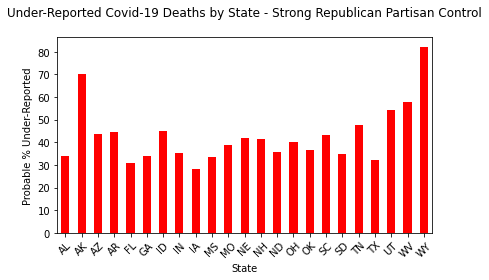

In [43]:
# Generate a bar plot showing Under-Reported Covid-19 Deaths in Strongly Republican States using pandas.
if not rep_strong.empty:
    rep_strong.set_index("StateAbbr",drop=True,inplace=True)
    ax1 = rep_strong.plot.bar(y=["Under-Report Check"], color="r", align="center", \
                         title="Under-Reported Covid-19 Deaths by State - Strong Republican Partisan Control\n")
    
    plt.xlabel("State")
    plt.ylabel("Probable % Under-Reported")
    plt.xticks(rotation=45)
    plt.gca().get_legend().remove()
    # plt.annotate("Avg = xx%", xy=(0, 0))
    plt.tight_layout()
    plt.show()

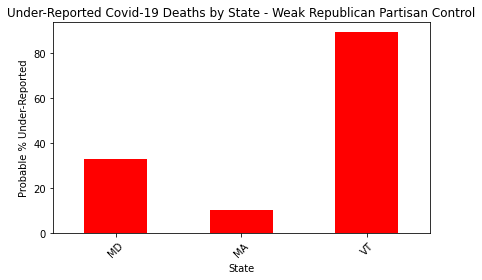

In [44]:
# Generate a bar plot showing Under-Reported Covid-19 Deaths in Weak Republican States using pandas.
if not rep_weak.empty:
    rep_weak.set_index("StateAbbr",drop=True,inplace=True)
    ax2 = rep_weak.plot.bar(y=["Under-Report Check"], color="r", align="center", \
                         title="Under-Reported Covid-19 Deaths by State - Weak Republican Partisan Control")
    
    plt.xlabel("State")
    plt.ylabel("Probable % Under-Reported")
    plt.xticks(rotation=45)
    plt.gca().get_legend().remove()
    # plt.annotate("Avg = xx%", xy=(0, 0))
    plt.tight_layout()
    plt.show()

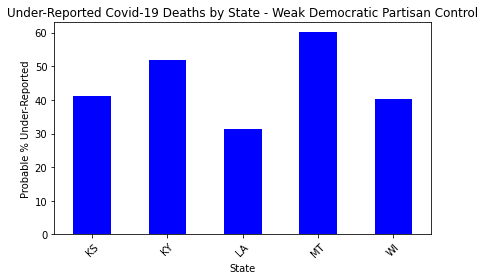

In [45]:
# Generate a bar plot showing Under-Reported Covid-19 Deaths in Weak Democratic States using pandas.
if not dem_weak.empty:
    dem_weak.set_index("StateAbbr",drop=True,inplace=True)
    ax3 = dem_weak.plot.bar(y=["Under-Report Check"], color="b", align="center", \
                         title="Under-Reported Covid-19 Deaths by State - Weak Democratic Partisan Control")
    
    plt.xlabel("State")
    plt.ylabel("Probable % Under-Reported")
    plt.xticks(rotation=45)
    plt.gca().get_legend().remove()
    # plt.annotate("Avg = xx%", xy=(0, 0))
    plt.tight_layout()
    plt.show()

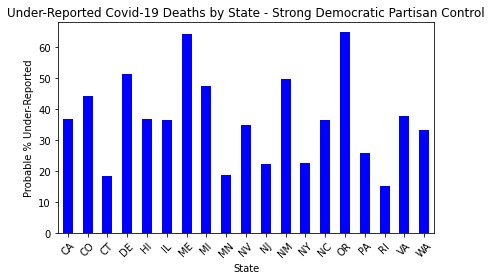

In [46]:
# Generate a bar plot showing Under-Reported Covid-19 Deaths in Strong Democratic States using pandas.
if not dem_strong.empty:
    dem_strong.set_index("StateAbbr",drop=True,inplace=True)
    ax4 = dem_strong.plot.bar(y=["Under-Report Check"], color="b", align="center", \
                         title="Under-Reported Covid-19 Deaths by State - Strong Democratic Partisan Control")
    
    plt.xlabel("State")
    plt.ylabel("Probable % Under-Reported")
    plt.xticks(rotation=45)
    plt.gca().get_legend().remove()
    # plt.annotate("Avg = xx%", xy=(0, 0))
    plt.tight_layout()
    plt.show()

In [47]:
if not rep_strong.empty: 
    rep_strong_mean = rep_strong["Under-Report Check"].mean()
    print(f"Average Under-Reported Covid-19 Deaths in Strong Republican States = {round(rep_strong_mean)}%")
if not rep_weak.empty: 
    rep_weak_mean = rep_weak["Under-Report Check"].mean()
    print(f"Average Under-Reported Covid-19 Deaths in Weak Republican States = {round(rep_weak_mean)}%")
if not dem_weak.empty: 
    dem_weak_mean = dem_weak["Under-Report Check"].mean()
    print(f"Average Under-Reported Covid-19 Deaths in Weak Democratic States = {round(dem_weak_mean)}%")
if not dem_strong.empty: 
    dem_strong_mean = dem_strong["Under-Report Check"].mean()
    print(f"Average Under-Reported Covid-19 Deaths in Strong Democratic States = {round(dem_strong_mean)}%")

Average Under-Reported Covid-19 Deaths in Strong Republican States = 43%
Average Under-Reported Covid-19 Deaths in Weak Republican States = 44%
Average Under-Reported Covid-19 Deaths in Weak Democratic States = 45%
Average Under-Reported Covid-19 Deaths in Strong Democratic States = 37%


In [48]:
if not rep_strong.empty: 
    rep_strong_median = rep_strong["Under-Report Check"].median()
    print(f"Median Under-Reported Covid-19 Deaths in Strong Republican States = {round(rep_strong_median)}%")
if not rep_weak.empty: 
    rep_weak_median = rep_weak["Under-Report Check"].median()
    print(f"Median Under-Reported Covid-19 Deaths in Weak Republican States = {round(rep_weak_median)}%")
if not dem_weak.empty: 
    dem_weak_median = dem_weak["Under-Report Check"].median()
    print(f"Median Under-Reported Covid-19 Deaths in Weak Democratic States = {round(dem_weak_median)}%")
if not dem_strong.empty: 
    dem_strong_median = dem_strong["Under-Report Check"].median()
    print(f"Median Under-Reported Covid-19 Deaths in Strong Democratic States = {round(dem_strong_median)}%")

Median Under-Reported Covid-19 Deaths in Strong Republican States = 40%
Median Under-Reported Covid-19 Deaths in Weak Republican States = 33%
Median Under-Reported Covid-19 Deaths in Weak Democratic States = 41%
Median Under-Reported Covid-19 Deaths in Strong Democratic States = 37%
